In [1003]:
# Import Statements 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score

In [1004]:
df = pd.read_csv('Cust_Seg.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [1005]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [1006]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [1007]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [1008]:
df.duplicated().sum()

0

## Value Distribution

In [1009]:
df['Gender'].value_counts()

Gender
Female    1186
Male       814
Name: count, dtype: int64

In [1010]:
df['Profession'].value_counts(dropna=False)

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
NaN               35
Name: count, dtype: int64

/var/folders/rb/9fs3xnrn63ndtk7p236vg6sh0000gn/T/ipykernel_92294/4132693994.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.drop(columns='CustomerID').hist(ax=ax)


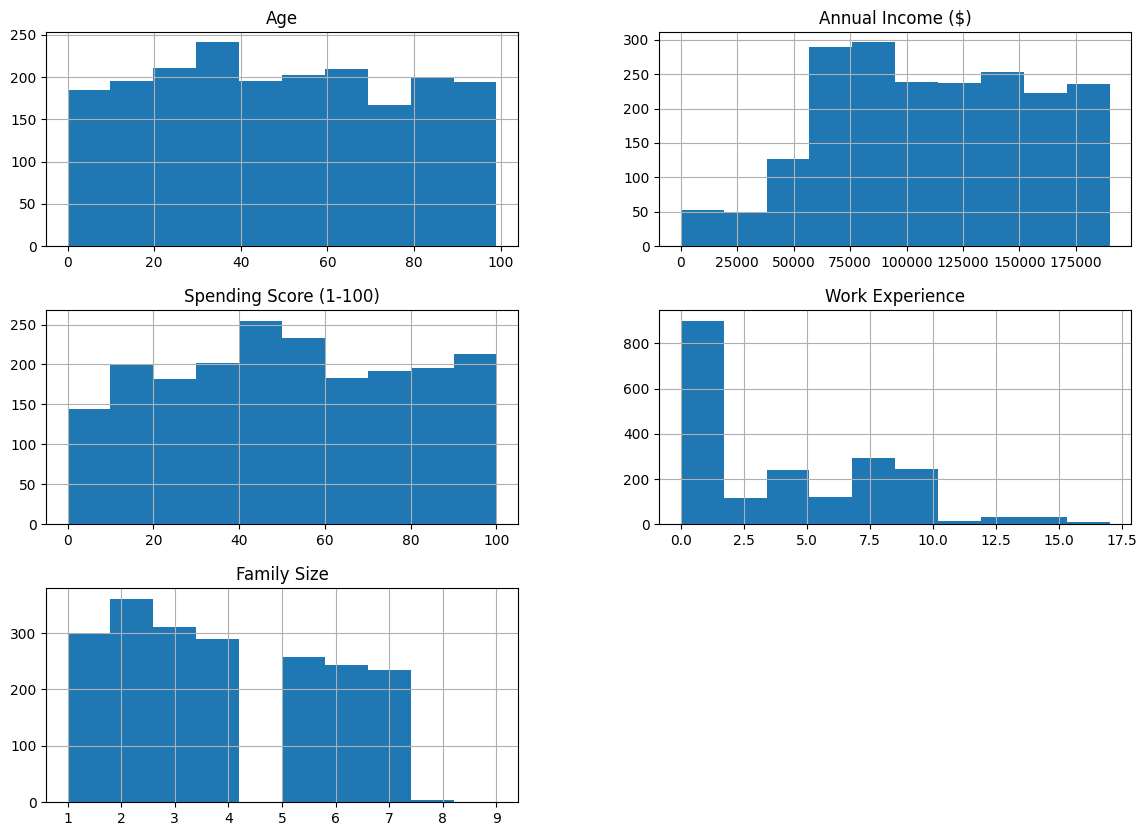

In [1011]:
fig, ax = plt.subplots(figsize=(14,10))
df.drop(columns='CustomerID').hist(ax=ax)

plt.show()

## Correlation Heat Map

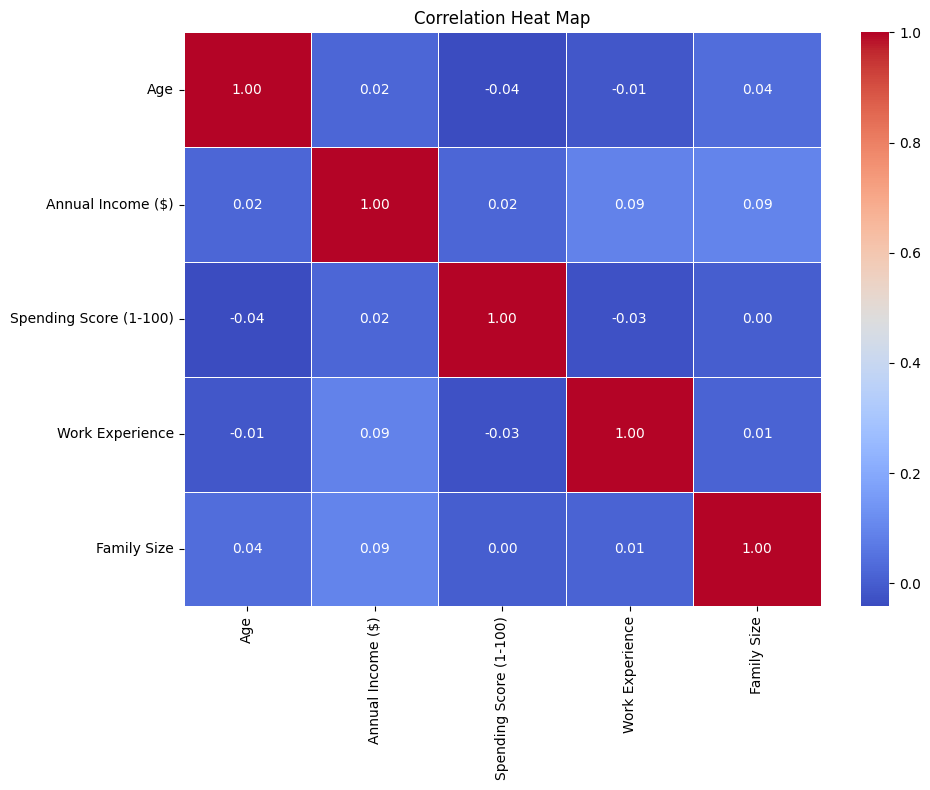

In [1012]:
corr_map = df.drop(columns='CustomerID').corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_map, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title("Correlation Heat Map")
plt.tight_layout()
plt.show()

## Handling Missing Values 

In [1013]:
df.dropna(inplace=True)

In [1014]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

### Separate categorical and numeric

In [1015]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

### One-hot encode categorical 

In [1016]:
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [1017]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   CustomerID                1965 non-null   int64
 1   Age                       1965 non-null   int64
 2   Annual Income ($)         1965 non-null   int64
 3   Spending Score (1-100)    1965 non-null   int64
 4   Work Experience           1965 non-null   int64
 5   Family Size               1965 non-null   int64
 6   Gender_Female             1965 non-null   bool 
 7   Gender_Male               1965 non-null   bool 
 8   Profession_Artist         1965 non-null   bool 
 9   Profession_Doctor         1965 non-null   bool 
 10  Profession_Engineer       1965 non-null   bool 
 11  Profession_Entertainment  1965 non-null   bool 
 12  Profession_Executive      1965 non-null   bool 
 13  Profession_Healthcare     1965 non-null   bool 
 14  Profession_Homemaker      1965 non-null   boo

### Scale Features

In [1018]:
X = StandardScaler().fit_transform(df_encoded)

### Determining the Number of Clusters with Elbow Method and Silhouette Score

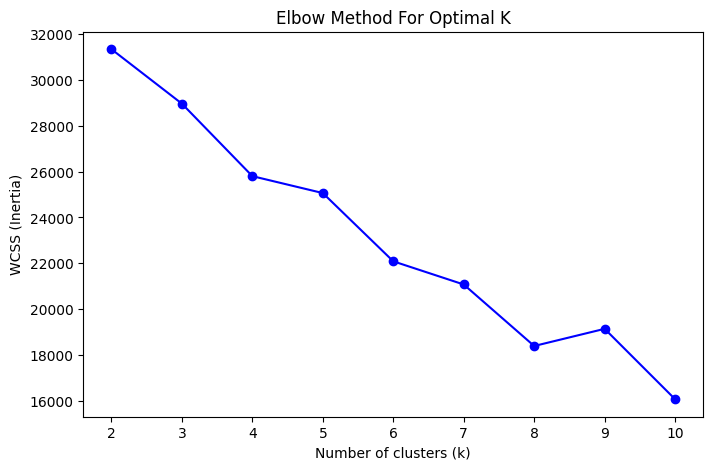

In [1019]:
wcss = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal K')
plt.show()

### Silhouette Coefficent

The Silhouette Coefficient ranges from -1 (poor clustering) to 1 (well-separated clusters), with values near 0 indicating overlapping clusters

In [1020]:
k_values = range(2, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=0,n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhouette score for k={k}: {score:.2f}")

Silhouette score for k=2: 0.13
Silhouette score for k=3: 0.14
Silhouette score for k=4: 0.13
Silhouette score for k=5: 0.18
Silhouette score for k=6: 0.20
Silhouette score for k=7: 0.22
Silhouette score for k=8: 0.25
Silhouette score for k=9: 0.30
Silhouette score for k=10: 0.26


In [1021]:
clusterNum = 9
k_means = KMeans(n_clusters = clusterNum,random_state=0, n_init=10)
k_means.fit(X)
y = k_means.labels_

df['Cluster'] = y + 1
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,Male,19,15000,39,Healthcare,1,4,3
1,2,Male,21,35000,81,Engineer,3,3,2
2,3,Female,20,86000,6,Engineer,1,1,2
3,4,Female,23,59000,77,Lawyer,0,2,4
4,5,Female,31,38000,40,Entertainment,2,6,1


In [1022]:
df['Cluster'].value_counts(ascending=True)

Cluster
7     60
8     85
4    142
9    153
6    161
2    179
1    234
3    339
5    612
Name: count, dtype: int64

### Centroids

In [1023]:
cluster_profiles = df.groupby('Cluster').agg({
    'Gender': lambda x: x.mode()[0],
    'Age': 'mean',
    'Annual Income ($)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Profession': lambda x: x.mode()[0],
    'Work Experience': 'mean',
    'Family Size': 'mean'
}).reset_index().round(2)

print(cluster_profiles)

   Cluster  Gender    Age  Annual Income ($)  Spending Score (1-100)  \
0        1  Female  51.16          110650.33                   52.94   
1        2  Female  55.09          111161.24                   48.97   
2        3  Female  47.84          112574.04                   50.52   
3        4  Female  47.75          110995.84                   48.86   
4        5  Female  49.00          108776.58                   52.68   
5        6  Female  46.62          111573.22                   51.90   
6        7  Female  45.37          108758.62                   46.38   
7        8  Female  45.82          107994.21                   48.72   
8        9  Female  46.60          113770.13                   49.90   

      Profession  Work Experience  Family Size  
0  Entertainment             3.50         3.89  
1       Engineer             3.96         3.58  
2     Healthcare             4.00         3.91  
3         Lawyer             3.53         3.62  
4         Artist             4.22 

### Checking Silhouette Score

In [1024]:
silhouette_coef = silhouette_score(X, y)
print(f"Silhouette Coefficient: {silhouette_coef:.2f}")

Silhouette Coefficient: 0.30


### Visualizing the Data

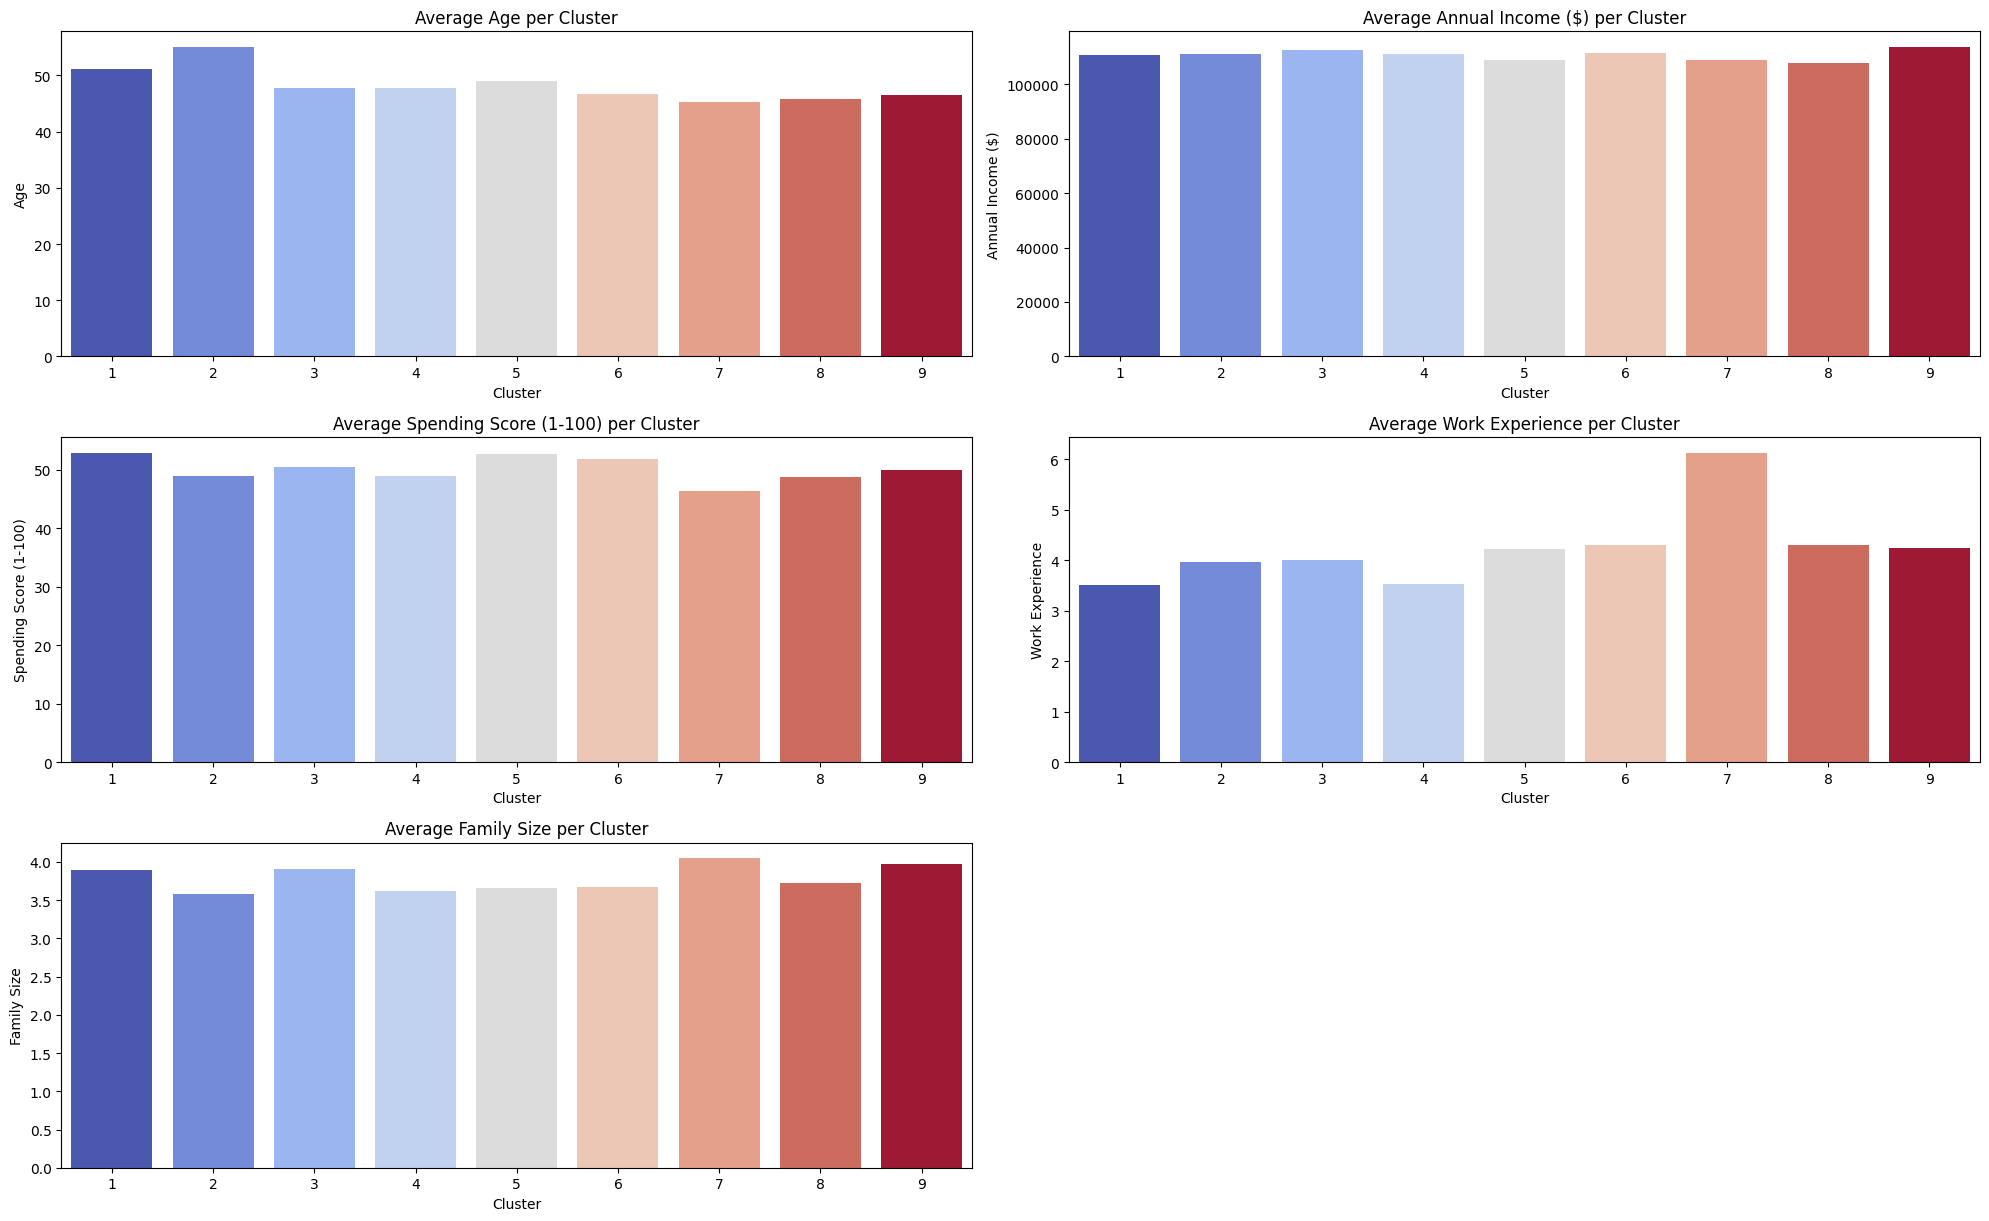

In [1025]:
numeric_cols = df.select_dtypes(include=np.number).drop(['CustomerID', 'Cluster'], axis=1).columns
fig = plt.figure(figsize=(20, 20))

for i, column in enumerate(numeric_cols):
    df_plot = df.groupby('Cluster')[column].mean().reset_index()  
    ax = fig.add_subplot(5, 2, i+1)
    sns.barplot(x= 'Cluster',hue='Cluster', y=column, data=df_plot, palette='coolwarm', ax=ax,legend=False)
    ax.set_title(f'Average {column.title()} per Cluster')

    
plt.tight_layout()    
plt.show()

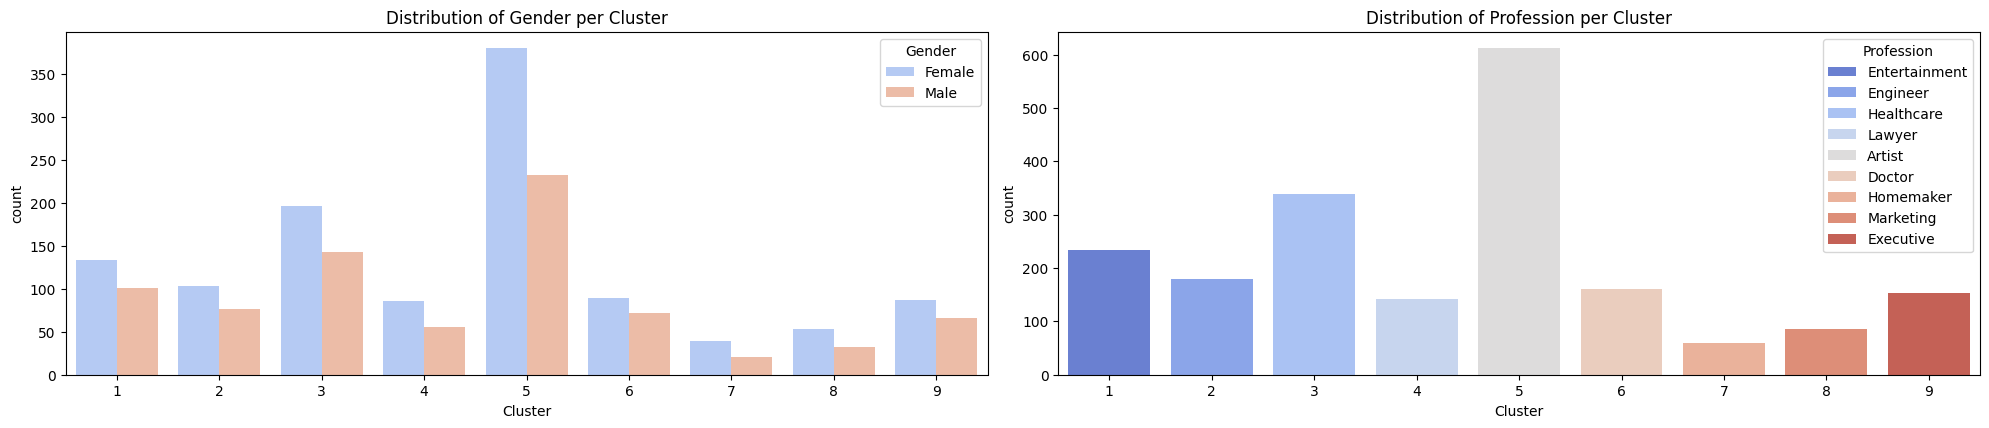

In [1026]:
fig = plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_cols):
    df_plot = df.groupby(['Cluster', column]).size().reset_index(name='count')
    ax = fig.add_subplot(5, 2, i+1)
    sns.barplot(x='Cluster', y='count', hue=column, data = df_plot, palette='coolwarm',ax=ax)
    ax.set_title(f'Distribution of {column.title()} per Cluster')

    
plt.tight_layout()
plt.show()